In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [5]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [1085]:
data_num = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
data_cat = data[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']]

In [1086]:
from sklearn import preprocessing 

In [1087]:
le = preprocessing.LabelEncoder()

data_cat_le = data_cat.apply(le.fit_transform)

In [1088]:
newdata = pd.concat([data_num, data_cat_le], axis=1)

In [1089]:
newdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,1,0


In [1090]:
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [1091]:
data_num.shape

(12330, 10)

Administrative

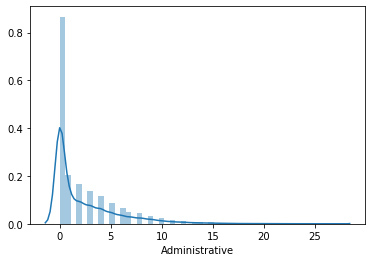

In [1092]:
sns.distplot(data_num['Administrative'])

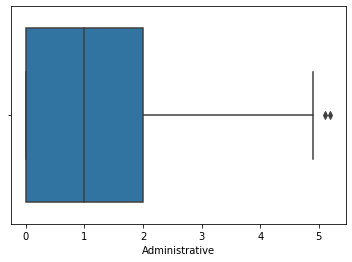

In [1093]:
sns.boxplot(np.sqrt(data_num['Administrative']))

In [1094]:
data_num['Administrative']=np.sqrt(np.sqrt(data_num['Administrative']))

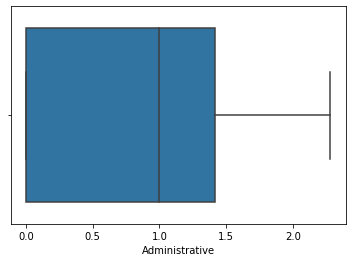

In [1095]:
sns.boxplot(data_num['Administrative'])

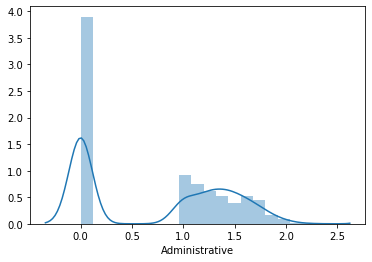

In [1096]:
sns.distplot(data_num['Administrative'])

Administrative Duration

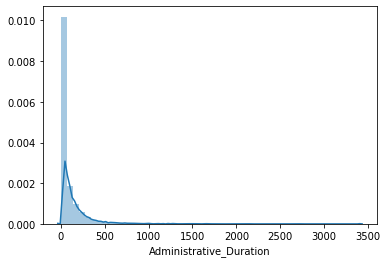

In [1097]:
sns.distplot(data_num['Administrative_Duration'])

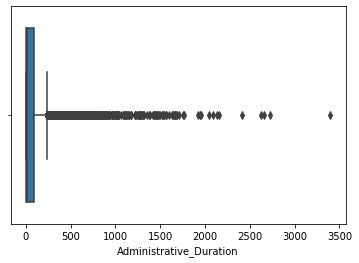

In [1098]:
sns.boxplot(data_num['Administrative_Duration'])

In [1099]:
data_num['Administrative_Duration'] = np.log1p(np.sqrt(data_num['Administrative_Duration']))

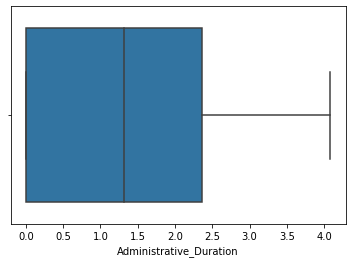

In [1100]:
sns.boxplot(data_num['Administrative_Duration'])

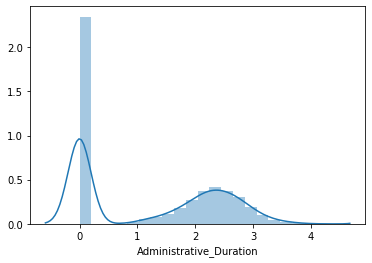

In [1101]:
sns.distplot(data_num['Administrative_Duration'])

Informational

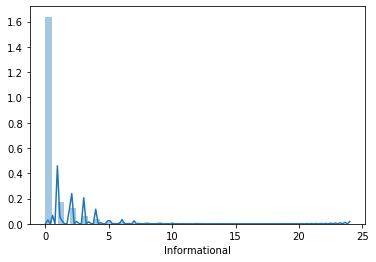

In [1102]:
sns.distplot(data_num['Informational'])

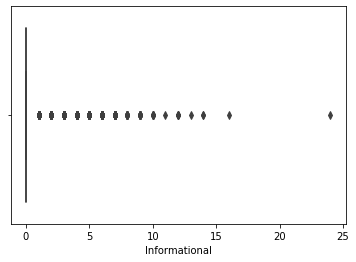

In [1103]:
sns.boxplot(data_num['Informational'])

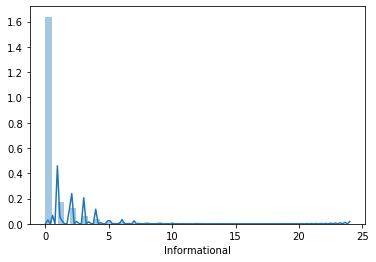

In [1104]:
sns.distplot(data_num['Informational'].dropna())

In [1105]:
data_num['Informational'] = np.sqrt(np.log(data_num['Informational']))

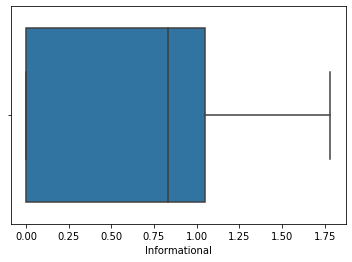

In [1106]:
sns.boxplot(data_num['Informational'])

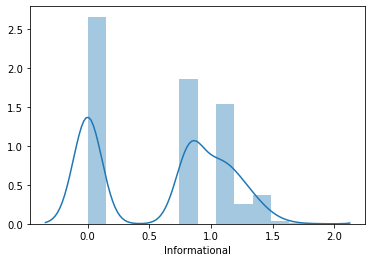

In [1107]:
sns.distplot(data_num['Informational'].dropna())

Informational Duration

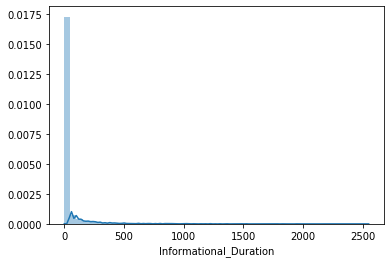

In [1108]:
sns.distplot(data_num['Informational_Duration'])

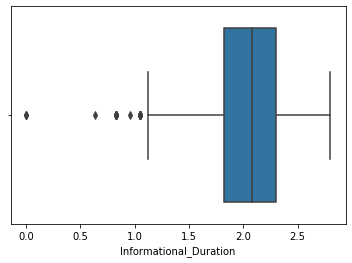

In [1109]:
sns.boxplot(np.sqrt(np.log(data_num['Informational_Duration'])))

In [1110]:
data_num['Informational_Duration'] = np.sqrt(np.log(data_num['Informational_Duration']))

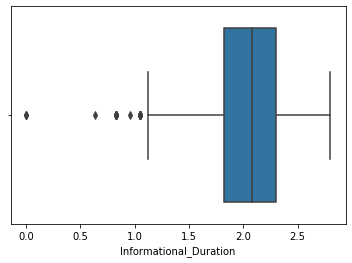

In [1111]:
sns.boxplot(data_num['Informational_Duration'])

In [1112]:
data_num.shape

(12330, 10)

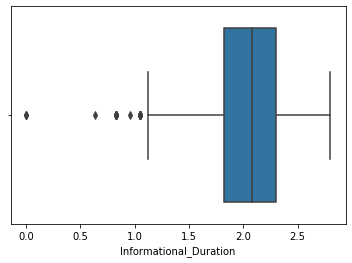

In [1113]:
sns.boxplot(data_num['Informational_Duration'])

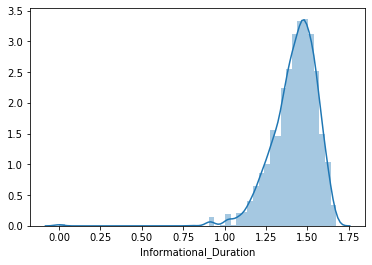

In [1114]:
sns.distplot(np.sqrt(data_num['Informational_Duration'].dropna()))

In [1115]:
q1 = data_num['Informational_Duration'].quantile(q= 0.25)
q3 = data_num['Informational_Duration'].quantile(q= 0.75)
iqr = q3-q1
print(iqr)
print(q3+1.5*iqr)
print(q1-1.5*iqr)

0.4778894704160608
3.020156367260292
1.108598485596049


In [1116]:
data_num[(data_num['Informational_Duration']<(q1-1.5*iqr)) | (data_num['Informational_Duration']>(q3+1.5*iqr)) ].shape

(32, 10)

In [1117]:
data_num.shape

(12330, 10)

In [1118]:
data_num = data_num[(data_num['Informational_Duration']>(q1-1.5*iqr)) & (data_num['Informational_Duration']<(q3+1.5*iqr)) ]

In [1120]:
data_num.shape

(2373, 10)

Product Related

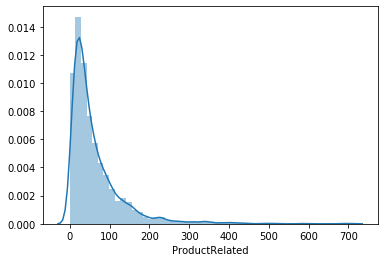

In [958]:
sns.distplot(data_num['ProductRelated'])

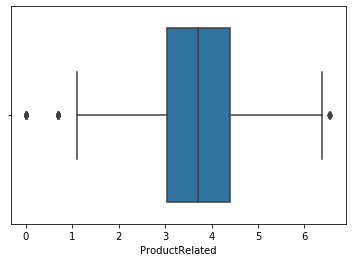

In [959]:
sns.boxplot(np.log(data_num['ProductRelated']))

In [960]:
data_num.shape

(2372, 10)

In [889]:
data_num['ProductRelated']=np.log(data_num['ProductRelated'])

In [890]:
q1 = data_num['ProductRelated'].quantile(q= 0.25)
q3 = data_num['ProductRelated'].quantile(q= 0.75)
iqr = q3-q1
print(iqr)
print(q3+1.5*iqr)
print(q1-1.5*iqr)

1.3499267169490161
6.4193392300959635
1.0196323622998986


In [891]:
data_num[(data_num['ProductRelated']<(q3+1.5*iqr)) &(data_num['ProductRelated']<(q1-1.5*iqr))].shape

(25, 10)

In [892]:
data_num = data_num[(data_num['ProductRelated']<(q3+1.5*iqr)) &(data_num['ProductRelated']>(q1-1.5*iqr))]

In [893]:
data_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
57,1.414214,2.138101,0.832555,2.188034,3.583519,998.741667,0.000000,0.014736,19.447079,0.2
103,1.189207,1.882173,0.000000,1.665109,3.583519,2083.530952,0.000000,0.013510,0.000000,0.8
109,1.565085,2.947717,1.177410,2.131501,4.852030,5062.213753,0.000855,0.017918,0.000000,0.0
114,0.000000,0.000000,0.000000,2.128990,3.401197,1045.833333,0.012903,0.035484,0.000000,0.2
122,0.000000,0.000000,0.832555,2.077857,2.639057,442.333333,0.000000,0.034375,0.000000,0.8


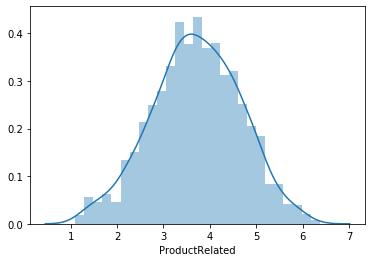

In [894]:
sns.distplot(data_num['ProductRelated'])

Product Related Duration

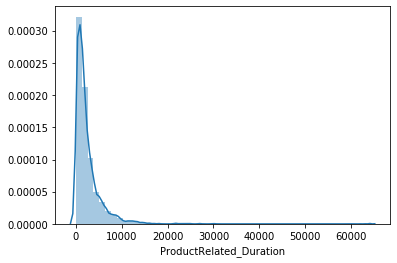

In [895]:
sns.distplot(data_num['ProductRelated_Duration'])

In [900]:
data_num['ProductRelated_Duration']=np.log(np.sqrt(data_num['ProductRelated_Duration']))

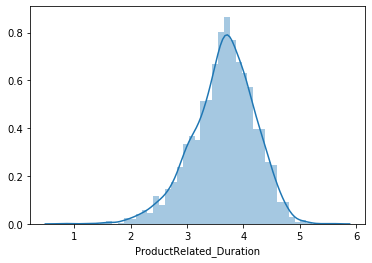

In [901]:
sns.distplot(data_num['ProductRelated_Duration'])

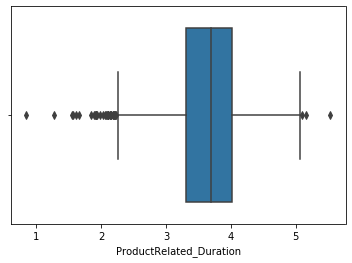

In [904]:
sns.boxplot(data_num['ProductRelated_Duration'])

In [905]:
q1 = data_num['ProductRelated_Duration'].quantile(q= 0.25)
q3 = data_num['ProductRelated_Duration'].quantile(q= 0.75)
iqr = q3-q1
print(iqr)
print(q3+1.5*iqr)
print(q1-1.5*iqr)

0.7038951082387577
5.073096645221407
2.257516212266376


In [911]:
data_num[(data_num['ProductRelated_Duration']<(q1-1.5*iqr)) | (data_num['ProductRelated_Duration']>(q3+1.5*iqr))].shape

(36, 10)

In [912]:
data_num = data_num[(data_num['ProductRelated_Duration']>(q1-1.5*iqr)) | (data_num['ProductRelated_Duration']<(q3+1.5*iqr))]

In [913]:
data_num.shape

(2345, 10)